# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Google Drive: . Extrae los datos en un par de carpetas: `seg_train` y `seg_test`.

Se pide:
1. Carga las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalúa el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo


**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer, con softmax como última capa.

In [23]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (32, 32)

In [28]:
print(class_names)
print(class_names_label)
print(type(list(class_names_label.keys())[0]))

['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}
<class 'str'>


In [92]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                         
import tensorflow as tf
from tensorflow import keras

## Cargando imágenes

Itera por las diferentes carpetas leyendo las imágenes y asignando un label. La idea es obtener un array de arrays, es decir, un array de imágenes de 2D. Para leer cada una de las imágenes itera archivo a archivo y lee la imagen como:

```Python
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
```

donde ``img_path`` es la ruta relativa de la imagen bajo estudio, e ``IMAGE_SIZE`` una tupla con el tamaño de la imagen.

Además, para recorrer cada uno de los ficheros o carpetas que existen en una carpeta en concreto, puedes hacerlo como:

```Python
    os.listdir(carpeta_de_la_que_inspeccionar_archivos)
```

In [36]:
# # Por ejemplo, para ver los ficheros de esta misma carpeta:
# for carpeta in os.listdir("seg_train"):
#     print(carpeta)
#     os.listdir(f"seg_train/{carpeta}")

In [42]:
pwd

'C:\\Users\\TheBridge\\Desktop\\bootcamp_thebridge_PTSep20\\bootcamp_thebridge_PTSep20\\Bloque 3 - Machine Learning\\05_Deep_Learning\\2-Redes Convolucionales\\ejercicios'

In [55]:
carpeta

'street'

In [76]:
def carga_fotos(root_path):
    train_images = []
    train_labels = []

    for carpeta in os.listdir(root_path):
        for imagen_path in os.listdir(f"{root_path}/{carpeta}"):
            image = cv2.imread(f"{root_path}/{carpeta}/{imagen_path}")
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)

            train_images.append(image)
            train_labels.append(carpeta)

    train_images = np.array(train_images)
    train_labels = np.array(train_labels)

    return train_images, train_labels

In [83]:
train_images, train_labels = carga_fotos("seg_train")
test_images, test_labels = carga_fotos("seg_test")

buildings


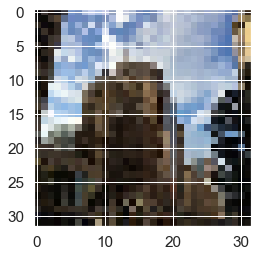

In [84]:
plt.imshow(train_images[2000])
print(train_labels[2000])

In [101]:
# Mezclamos datos
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

## Investigar imagenes

¿Cuántas imágenes hay de train? ¿Y de test?

In [99]:
train_images.shape

(14034, 32, 32, 3)

In [100]:
test_images.shape

(3000, 32, 32, 3)

Calcula cuántas imágenes hay de train y de test por cada categoría:

In [94]:
pd.Series(train_labels).value_counts()

mountain     2512
glacier      2404
street       2382
sea          2274
forest       2271
buildings    2191
dtype: int64

In [95]:
pd.Series(test_labels).value_counts()

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
dtype: int64

## Escalamos

Reduce el valor de los datos a una escala 0 a 1:

In [104]:
train_images = train_images/255

## Visualizamos

Una imagen aleatoria del total:

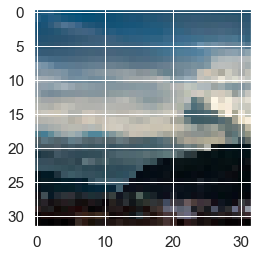

In [107]:
plt.imshow(train_images[20])

Las primeras 25 imágenes con su clase (haz un subplot y escribe la clase con xlabel):

## Model

Crea un modelo y entrénalo guardando un 20% de datos para validación:

### Evalúa y representa las métricas de train y validación:

### Evalúa para test:

### Haz algunas predicciones y comprueba visualmente si el modelo acierta o no:

## Confusion matrix

Predice todo test y genera la matriz de confusión. ¿En cuál nos estamos confundiendo más?

## EXTRA

¿Podríamos mejorar el modelo? ¿Se te ocurre cómo? Modifica diferentes parámetros para conseguir mejorar el modelo: